In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Define constants
image_size = (128, 128)  # Adjust the size based on your dataset
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [5]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10


I0000 00:00:1708874390.959941     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


277/277 [==============================] - 78s 258ms/step - loss: 0.6582 - accuracy: 0.5859 - val_loss: 0.5893 - val_accuracy: 0.6600
Epoch 2/10
277/277 [==============================] - 52s 187ms/step - loss: 0.6029 - accuracy: 0.6500 - val_loss: 0.5254 - val_accuracy: 0.7133
Epoch 3/10
277/277 [==============================] - 52s 186ms/step - loss: 0.5058 - accuracy: 0.7369 - val_loss: 0.5512 - val_accuracy: 0.6933
Epoch 4/10
277/277 [==============================] - 52s 188ms/step - loss: 0.4192 - accuracy: 0.7989 - val_loss: 0.5598 - val_accuracy: 0.6550
Epoch 5/10
277/277 [==============================] - 52s 187ms/step - loss: 0.3576 - accuracy: 0.8320 - val_loss: 0.4685 - val_accuracy: 0.7217
Epoch 6/10
277/277 [==============================] - 52s 187ms/step - loss: 0.2982 - accuracy: 0.8613 - val_loss: 0.4397 - val_accuracy: 0.7850
Epoch 7/10
277/277 [==============================] - 52s 188ms/step - loss: 0.2694 - accuracy: 0.8816 - val_loss: 0.4888 - val_accuracy: 0.7

In [8]:
# Evaluate the model
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 1s 59ms/step - loss: 0.6599 - accuracy: 0.7017
Test Accuracy: 70.17%


In [9]:
# Make predictions on new data
predictions = model.predict(test_generator)

# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int)

19/19 [==============================] - 1s 58ms/step


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[180 180]
 [123 117]]


In [11]:
# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=['not_fractured', 'fractured'])
print("Classification Report:")
print(class_report)

Classification Report:
               precision    recall  f1-score   support

not_fractured       0.59      0.50      0.54       360
    fractured       0.39      0.49      0.44       240

     accuracy                           0.49       600
    macro avg       0.49      0.49      0.49       600
 weighted avg       0.51      0.49      0.50       600



1/1 [==============================] - 0s 85ms/step


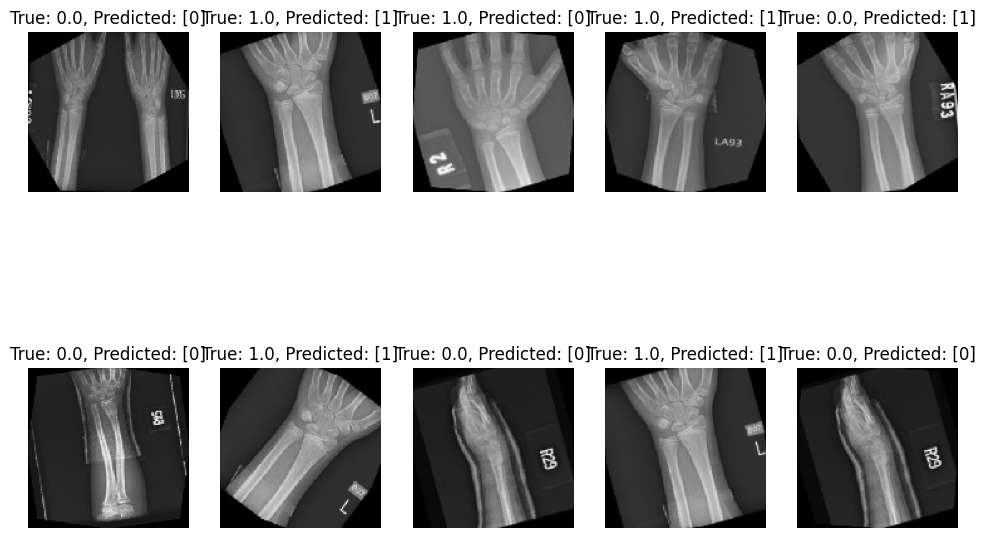

In [12]:
import matplotlib.pyplot as plt
import random

# Visualize random predictions
test_images, true_labels = next(test_generator)
predicted_labels = (model.predict(test_images) > 0.5).astype(int)

# Plot some sample images with true and predicted labels
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()